<a href="https://colab.research.google.com/github/CatDawn29/Catherine-Project-2.0/blob/main/Tippins_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Set 2: Stroke Prediction
Source of data: Kaggle.com, from the pre approved data sets

Brief description of data: This data gives us the various descriptions of the underlying factors of why someone has a stroke.

What is the target? My focus target is the prediction of who will get a stroke based on underlying factors.

What does one row represent? (A person? A business? An event? A product?): Each row represents a different person

Is this a classification or regression problem?: I would say that this is an regression problem due to the fact it is predicting if someone will get a stroke or not.

How many features does the data have?: 12 attributes

How many rows are in the dataset?: 5110 rows

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?: The challenge I forsee is maybe having to do classification for this instead of regression, due to some of the columns being yes or no.

In [1]:
#Basic Pandas and Numpy
import numpy as np
import pandas as pd

#EDA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#Pre-Processing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Regression Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Classification Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
filename = ('healthcare-dataset-stroke-data.csv')
stroke_df = pd.read_csv(filename)

In [3]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke_df.drop(columns = ["id"], inplace = True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


I dropped ever married and id, because I believe there is greater causes to stroke relate causes than if a person was ever married and I do not see how id is related to how someone can get a stroke or not.

##Cleaning Data for Analysis
*Drop unnecessary columns

*Check for Duplicates

*Check for Categorical Issues

*Make sure Data Types Match with Data Dict

*Check for outliers/impossible numerical values

*Checking (but not fixing) missing values (will do this after train-test split)

In [5]:
stroke_df.shape
print(f'There are {stroke_df.shape[0]} rows, and {stroke_df.shape[1]} columns.')
print(f'The rows represent {stroke_df.shape[0]} observations, and the columns represent {stroke_df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 11 columns.
The rows represent 5110 observations, and the columns represent 10 features and 1 target variable.


In [6]:
stroke_df.duplicated().sum()

0

In [7]:
stroke_df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Anything that is not frequenct "occurs more than 3% of the time" --> drop them 

stroke_df["gender"].value_counts(normalize = True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [9]:
stroke_df = stroke_df[stroke_df['gender'] != 'Other']
stroke_df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [10]:
stroke_df.age = stroke_df.age.round();

In [11]:
# Change this to integers we dont neeed decimals in age --> few months would not be a factor in the study
# How to round the values in a coulmn dataframe pandas 
stroke_df["age"].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name: age, Length: 83, dtype: int64

In [12]:
stroke_df["hypertension"].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [13]:
stroke_df["heart_disease"].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [14]:
stroke_df["work_type"].value_counts(normalize = True)

Private          0.572323
Self-employed    0.160305
children         0.134469
Govt_job         0.128597
Never_worked     0.004306
Name: work_type, dtype: float64

In [15]:
df = stroke_df[stroke_df['work_type'] != 'Never_worked']

In [16]:
df["work_type"].value_counts(normalize = True)

Private          0.574799
Self-employed    0.160999
children         0.135050
Govt_job         0.129153
Name: work_type, dtype: float64

In [17]:
df["Residence_type"].value_counts()

Urban    2581
Rural    2506
Name: Residence_type, dtype: int64

In [18]:
# round the values here as well....
df.avg_glucose_level = df.avg_glucose_level.round();
df["avg_glucose_level"].value_counts();

C:\Users\cathe\AppData\Local\Temp\ipykernel_7928\2430486276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_glucose_level = df.avg_glucose_level.round();


In [19]:
# round the values here as well
df.bmi = df.bmi.round();
df["bmi"].value_counts();

C:\Users\cathe\AppData\Local\Temp\ipykernel_7928\3036996459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi = df.bmi.round();


In [20]:
df = df.dropna(subset=["bmi"])

In [21]:
df["smoking_status"].value_counts()

never smoked       1838
Unknown            1475
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

In [22]:
df["stroke"].value_counts()

0    4677
1     209
Name: stroke, dtype: int64

In [23]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4886.000000,4886.000000,4886.000000,4886.000000,4886.000000,4886.000000
mean,42.989153,0.092305,0.049734,105.336267,28.908923,0.042775
std,22.534715,0.289485,0.217417,44.485993,7.867668,0.202371
min,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000
25%,25.000000,0.000000,0.000000,77.000000,24.000000,0.000000
50%,45.000000,0.000000,0.000000,92.000000,28.000000,0.000000
75%,60.000000,0.000000,0.000000,113.750000,33.000000,0.000000
max,82.000000,1.000000,1.000000,272.000000,98.000000,1.000000


In [24]:
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [25]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [26]:
print(df.isna().sum()/len(df)*100)

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64


#Correlation Heatmap

In [27]:
corr = stroke_df.corr(numeric_only = True)
corr.round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.25,0.13,0.13,0.13,0.04,1.00


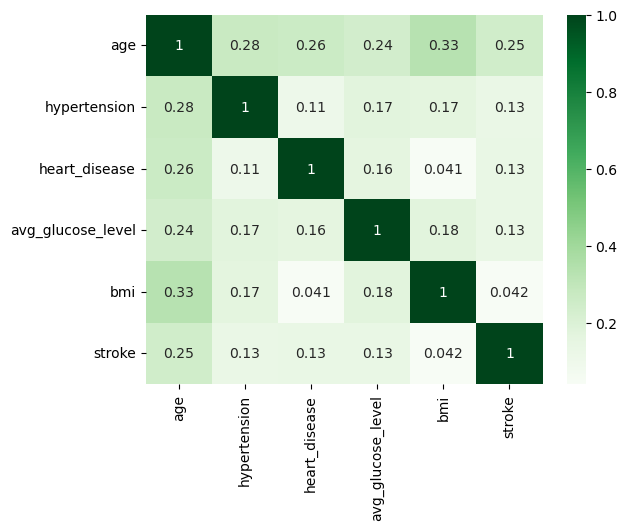

In [28]:
# Please add the numbers in the boxes for clarity --> better/quickers insights 
sns.heatmap(corr, cmap = 'Greens',annot = True);

#Univariate Visualizations: Histograms and Barplots 

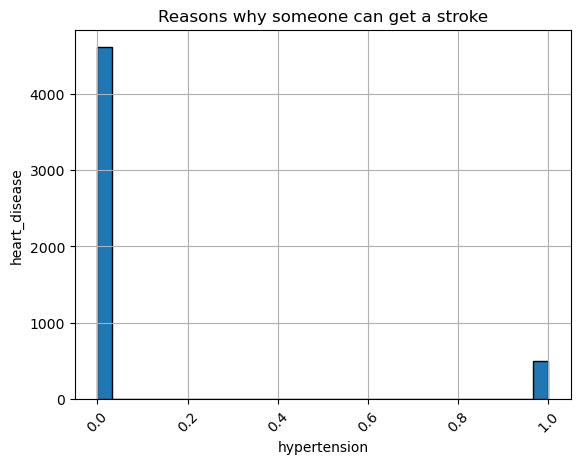

In [29]:
# Add gender as a hue 

ax = stroke_df['hypertension'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.ticklabel_format(style='plain')
ax.set_title('Reasons why someone can get a stroke')
ax.set_xlabel('hypertension')
ax.set_ylabel('heart_disease');


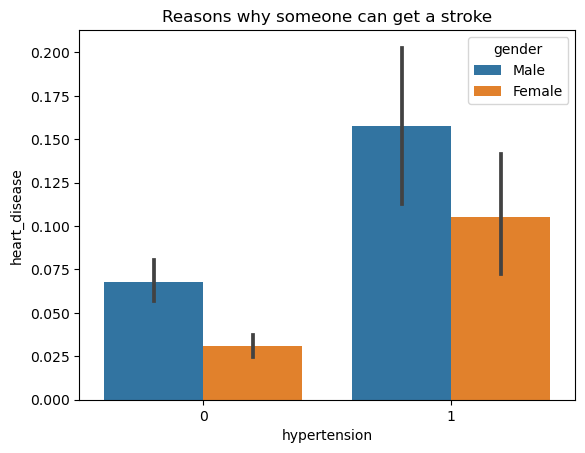

In [30]:
ax = sns.barplot(data=stroke_df, x='hypertension', y='heart_disease', hue='gender');
ax.set_title("Reasons why someone can get a stroke");

#Multivariate Visualization: Scatterplot

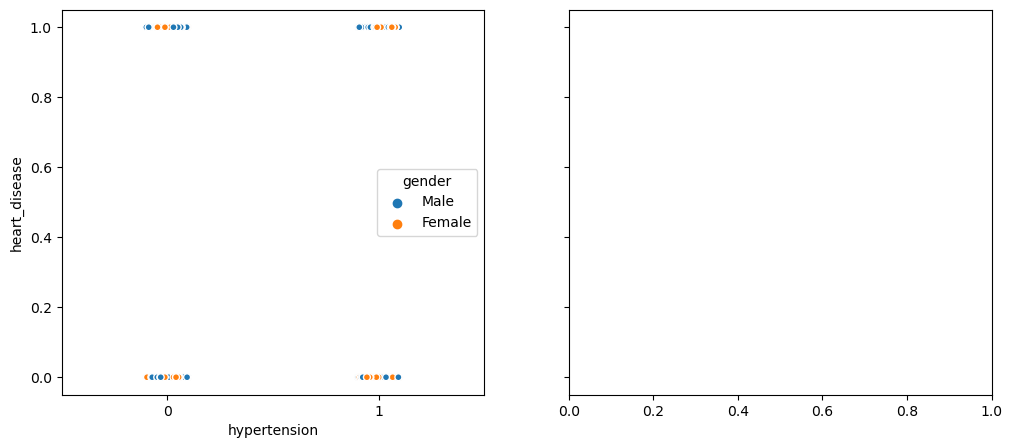

In [31]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.stripplot(data=stroke_df, x='hypertension', y='heart_disease',ax=axes[0],
                   hue='gender', edgecolor='white', linewidth=1);

- I chose the features of heart disease and hypertension because to me it shows that the higher the hypertension and heart disease the higher risk of having a stroke.

# I will begin preprocessing steps

In [32]:
df["gender"].replace({"Male": 0,
                           "Female": 1}, inplace = True)
df["gender"].value_counts()

1    2886
0    2000
Name: gender, dtype: int64

In [33]:
df["ever_married"].replace({"Yes": 0,
                             "No": 1}, inplace = True)
df["ever_married"].value_counts()

0    3204
1    1682
Name: ever_married, dtype: int64

# I will now begin splitting the data

In [34]:
X = df.drop(columns = "stroke").copy()
y = df["stroke"].copy()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y , random_state=42)

In [36]:
y_train.value_counts(normalize=True)

0    0.957151
1    0.042849
Name: stroke, dtype: float64

In [37]:
y_test.value_counts(normalize=True)

0    0.957447
1    0.042553
Name: stroke, dtype: float64

In [38]:
#Creating Column Selectors

#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
#select the numeric columns of each type
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)

#instantiate SimpleImputers with most_frequent and median strategies
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [39]:
#Make the Scaler instances
scaler = StandardScaler()

#Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')

#Select numerical and categorical columns:
num_columns = num_selector(X_train)

#Create SimpleImputer Objects for imputation
mean_imputer = SimpleImputer(strategy='mean')

# create tuples of (imputer, selector) for each datatype
num_tuple = (mean_imputer, num_selector)

numeric_pipe = make_pipeline(mean_imputer, scaler)
number_tuple = (numeric_pipe, num_selector)

col_transformer = make_column_transformer(number_tuple, remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002394CCD06A0>)])

In [40]:
#instantiate one hot encoder and scaler
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

preprocessor = make_column_transformer(number_tuple, category_tuple, remainder = "passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002394CCD06A0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002394CCCCE50>)])

In [41]:
df = df[['gender']].astype({'gender': float})

# Model 1: Logistics Regression

In [42]:
#col_transformer = make_column_transformer(number_tuple, remainder='passthrough')

logreg = LogisticRegression(C = 10)
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(col_transformer, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_test, y_test)) #this is accuracy score

ValueError: could not convert string to float: 'Private'

In [ ]:
#Tuning Logistic Regression via L1 or L2
#Tuning L1 Regularization

# Range of c values for tuning
#First set was 10^-4 to 10^3 via factors of 10
c_values = [ .00001, .0001, .01, .1, 1, 10, 100, 1000];

train_scores = [];
test_scores = [];

for c in c_values:
  
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1');
  log_reg_pipe = make_pipeline(col_transformer, log_reg);
  log_reg_pipe.fit(X_train, y_train);
 
  train_scores.append(log_reg_pipe.score(X_train, y_train));
  test_scores.append(log_reg_pipe.score(X_test, y_test));
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1);
ax.plot(c_values, train_scores, label='Training Accuracy');
ax.plot(c_values, test_scores, label='Testing Accuracy');
ax.set_xticks(c_values);
ax.set_title('Change in accuracy over C values for L1 regularization');
ax.legend();
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log');
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)};

In [ ]:
logreg = LogisticRegression(C = .0001, solver='liblinear', penalty='l1')
# Instantiate Scaler
scaler = StandardScaler()
# Create pipeline
logreg_pipe = make_pipeline(col_transformer, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_test, y_test)) #this is accuracy score

# Model 2: KNN 

In [ ]:
#Creating KNN Classifier

# model instance
knn = KNeighborsClassifier()
# scaling the model
knn_pipe = make_pipeline(col_transformer, knn)
# fitting the model
knn_pipe.fit(X_train, y_train)

predictions = knn_pipe.predict(X_test)

acc_score = knn_pipe.score(X_test, y_test)
acc_score

print(f"The model is {round(acc_score*100, 2)}% accurate")

In [ ]:
knn.get_params()

In [ ]:
#Tuning Classifier
# hypertuning by neighbors, tried 10-200 by 10s, then 10-30 by 1s
numNeighbors = 5
currAcc = acc_score.copy()
currI = 5
test_scores = pd.DataFrame(index=list(range(10,30)), columns=['Test Score'])
test_scores.head()

for i in range(10, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn_pipe = make_pipeline(col_transformer, knn)
  knn_pipe.fit(X_train, y_train)
  predictions = knn_pipe.predict(X_test)
  acc_score = knn_pipe.score(X_test, y_test)
  test_scores.loc[i, 'Test Score'] = acc_score
test_scores = test_scores.sort_values(by='Test Score', ascending=False)
test_scores.head()

# Grid Search CV begins

In [ ]:
dt_grid_search = GridSearchCV(model, param_grid)

In [ ]:
dt_grid_search.fit(X_train, y_train)

In [ ]:
dt_grid_search.best_params_

In [ ]:
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}
 
dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train, y_train)
dt_grid_search2.best_params_

In [ ]:
#retrieve the best version of the model
best_model = dt_grid_search2.best_estimator_
 
#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

In [ ]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipe.get_params()

In [ ]:
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [ ]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)
 
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

# I will begin PCA 

In [ ]:
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(x)

In [ ]:
pca = PCA()
pca.fit(scaled_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=3)

In [ ]:
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

In [ ]:
logreg = LogisticRegression()
# Create a modeling pipeline
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

In [ ]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

In [ ]:
bagreg = BaggingClassifier()
# Create a modeling pipeline
bagreg_pipe = make_pipeline(transformer, bagreg)
bagreg_pipe.fit(X_train, y_train)

In [ ]:
print('Training accuracy:', bagreg_pipe.score(X_train, y_train))
print('Testing accuracy:', bagreg_pipe.score(X_test, y_test))